In [1]:
import pandas as pd

# Load the dataset
df = pd.read_pickle('domestic_1990-2009_data.pkl')
fd = df['Fly_date'].values[:,0]
df.drop('Fly_date',inplace=True, axis=1)
df['Fly_date'] = pd.to_datetime(fd)
# Extract unique routes
unique_routes = df[['Origin_airport', 'Destination_airport']].drop_duplicates()

# Display the unique routes
print(len(unique_routes))


36719


In [2]:
df.head()

,Origin_airport,Destination_airport,Month,Year,Total_passengers,Total_departures,Origin_city,Destination_city,Weekday,Day,Destination_population,Origin_population,Origin_state,Destination_state,Fly_date
0,EUG,RDM,11,1990,41,22,Eugene,Bend,Thursday,1,76034,284093,Oregon,Oregon,1990-11-01
1,EUG,RDM,12,1990,88,19,Eugene,Bend,Saturday,1,76034,284093,Oregon,Oregon,1990-12-01
2,EUG,RDM,10,1990,11,4,Eugene,Bend,Monday,1,76034,284093,Oregon,Oregon,1990-10-01
3,MFR,RDM,2,1990,0,1,Medford,Bend,Thursday,1,76034,147300,Oregon,Oregon,1990-02-01
4,MFR,RDM,3,1990,11,1,Medford,Bend,Thursday,1,76034,147300,Oregon,Oregon,1990-03-01


       Total_passengers  Total_departures
count      3.671900e+04      36719.000000
mean       2.641240e+05       3656.888886
std        1.308240e+06      15060.380068
min        0.000000e+00          0.000000
25%        1.000000e+00          1.000000
50%        1.270000e+02          4.000000
75%        1.122500e+03         41.000000
max        3.236461e+07     394909.000000


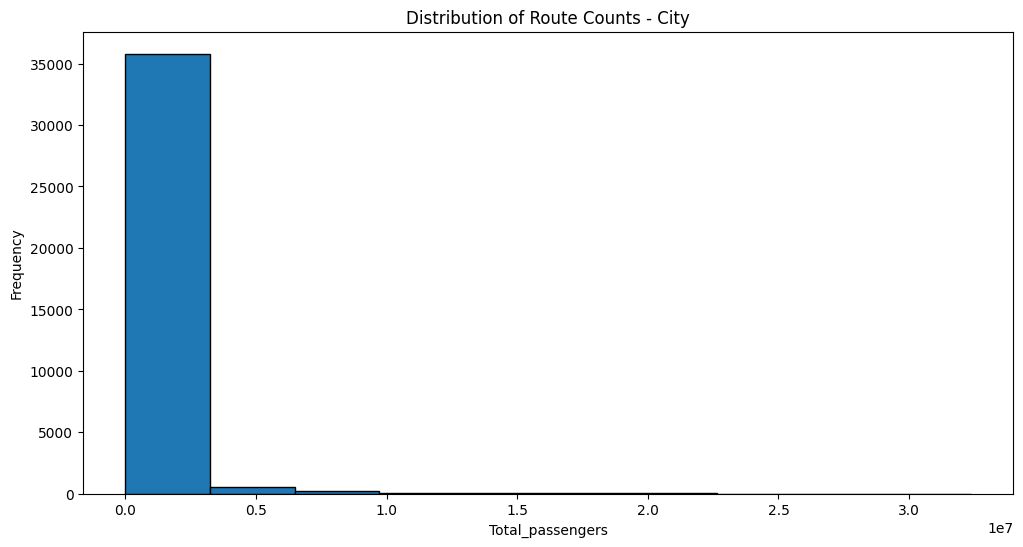

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Extract unique routes and their counts
sum_passengers_df = df.groupby(['Origin_airport', 'Destination_airport']).agg({'Total_passengers': 'sum', 'Total_departures': 'sum'}).reset_index()
route_counts = sum_passengers_df

# Sort routes by count in descending order
route_counts = route_counts.sort_values(by='Total_passengers', ascending=False)
print(route_counts.describe())
# Plot the top N routes
# Sort routes by count in descending order

# Plot the histogram of route counts
plt.figure(figsize=(12, 6))
plt.hist(route_counts['Total_passengers'].values, bins=10, edgecolor='black')
plt.title('Distribution of Route Counts - City')
plt.xlabel('Total_passengers')
plt.ylabel('Frequency')
plt.show()




In [46]:
route_counts

,Origin_airport,Destination_airport,Total_passengers,Total_departures
25706,OGG,HNL,32364612,394909
15625,HNL,OGG,29744742,389964
19159,LAX,HNL,28964154,140973
15606,HNL,LAX,28632161,135848
18874,LAS,LAX,26333721,291759
...,...,...,...,...
19487,LBL,PIA,0,1
19489,LBL,RFD,0,2
19491,LBL,SDM,0,1
19496,LBL,YIP,0,1


In [38]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [47]:
route_counts['Total_passengers']

25706    32364612
15625    29744742
19159    28964154
15606    28632161
18874    26333721
           ...   
19487           0
19489           0
19491           0
19496           0
36718           0
Name: Total_passengers, Length: 36719, dtype: int64

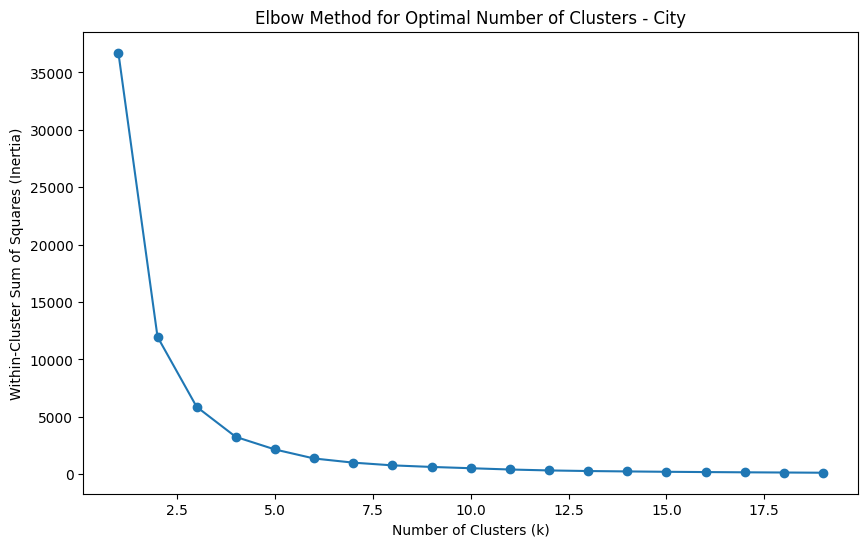

In [48]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# route_counts['Cluster'] = dbscan.fit_predict(route_counts_scaled)
# Use StandardScaler to standardize the features
scaler = StandardScaler()
route_counts_scaled = scaler.fit_transform(route_counts[['Total_passengers']])
# route_counts_scaled = scaler.fit_transform(route_counts)

# Determine the best number of clusters using the Elbow Method
inertia = []
possible_k_values = range(1,20)  # You can adjust the range based on your preference

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(route_counts_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters - City')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()

In [50]:
import seaborn as sns
kmeans = KMeans(n_clusters=7, random_state=42)
route_counts['KMeansCluster'] = kmeans.fit_predict(route_counts_scaled)




In [51]:
route_counts.to_csv('Kmeanscluster_20years.csv')

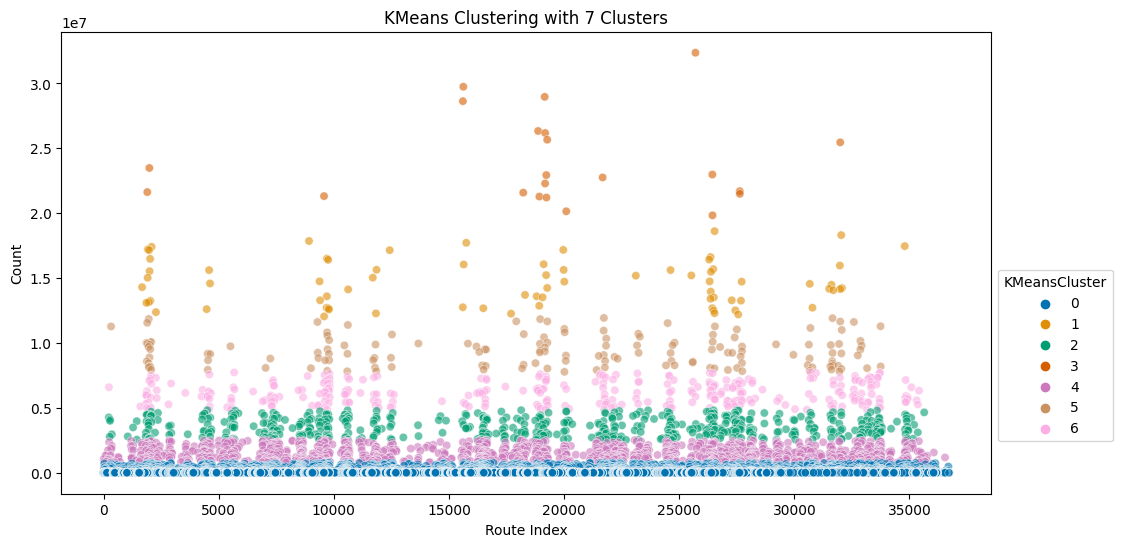

In [52]:
# Plot the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x=route_counts.index, y=route_counts['Total_passengers'], hue=route_counts['KMeansCluster'], palette='colorblind', alpha=0.6)
plt.title('KMeans Clustering with 7 Clusters')
plt.xlabel('Route Index')
plt.ylabel('Count')
plt.legend(title='KMeansCluster', bbox_to_anchor=(1, 0.5))
plt.show()

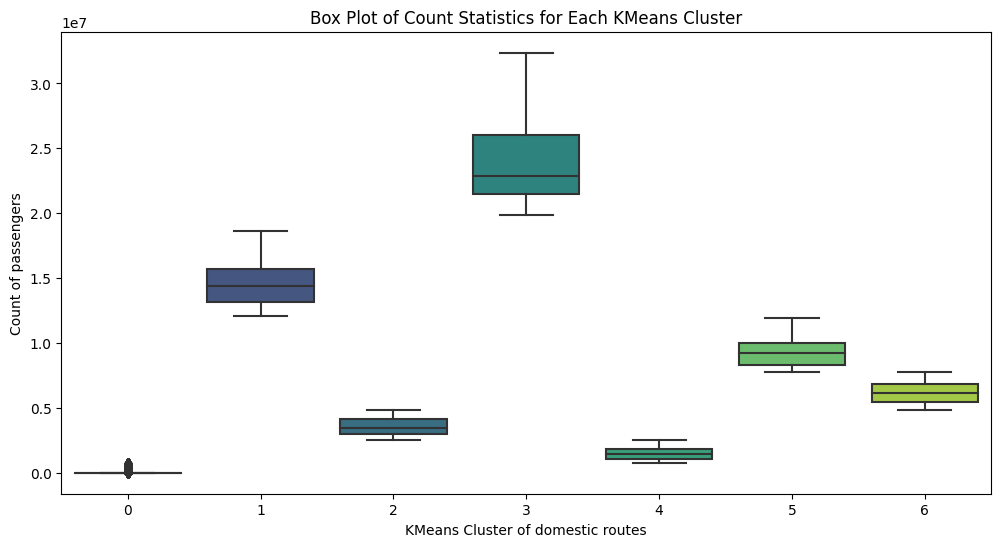

In [53]:
import seaborn as sns

# Plot the clusters
plt.figure(figsize=(12, 6))
sns.boxplot(x='KMeansCluster', y='Total_passengers', data=route_counts, palette='viridis')
plt.title('Box Plot of Count Statistics for Each KMeans Cluster')
plt.xlabel('KMeans Cluster of domestic routes')
plt.ylabel('Count of passengers')
plt.show()

       Total_passengers  Total_departures
count      4.870000e+02      4.870000e+02
mean       1.991452e+07      2.757234e+05
std        6.751724e+07      8.438868e+05
min        0.000000e+00      1.000000e+00
25%        8.250000e+01      4.150000e+01
50%        1.458620e+05      1.358200e+04
75%        4.234843e+06      1.126840e+05
max        6.467952e+08      8.371995e+06


c:\Users\neelk\anaconda3\envs\cis545\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  "KMeans is known to have a memory leak on Windows "


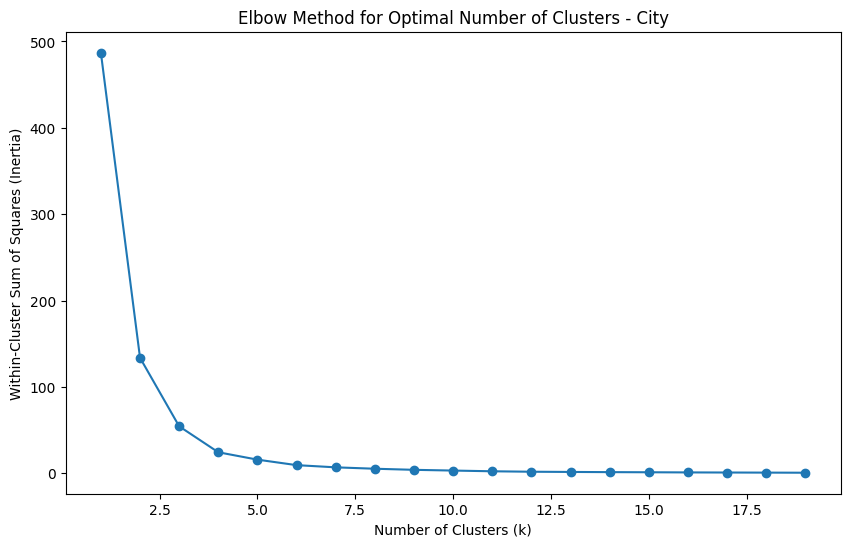

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Extract unique routes and their counts
sum_passengers_df = df.groupby(['Origin_city']).agg({'Total_passengers': 'sum', 'Total_departures': 'sum'}).reset_index()
route_counts = sum_passengers_df

# Sort routes by count in descending order
route_counts = route_counts.sort_values(by='Total_passengers', ascending=False)
print(route_counts.describe())


scaler = StandardScaler()
route_counts_scaled = scaler.fit_transform(route_counts[['Total_passengers']])

# Determine the best number of clusters using the Elbow Method
inertia = []
possible_k_values = range(1,20)  # You can adjust the range based on your preference

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(route_counts_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters - City')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()



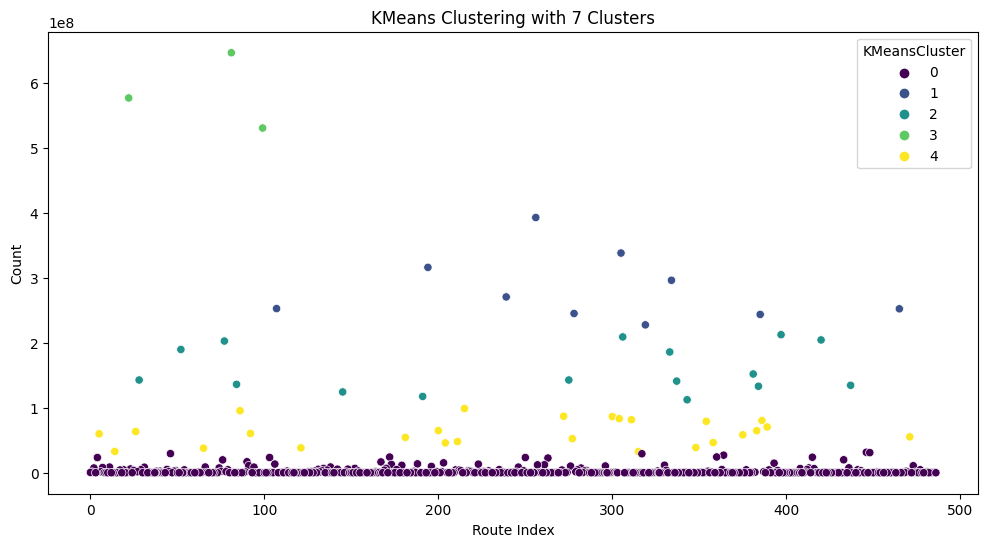

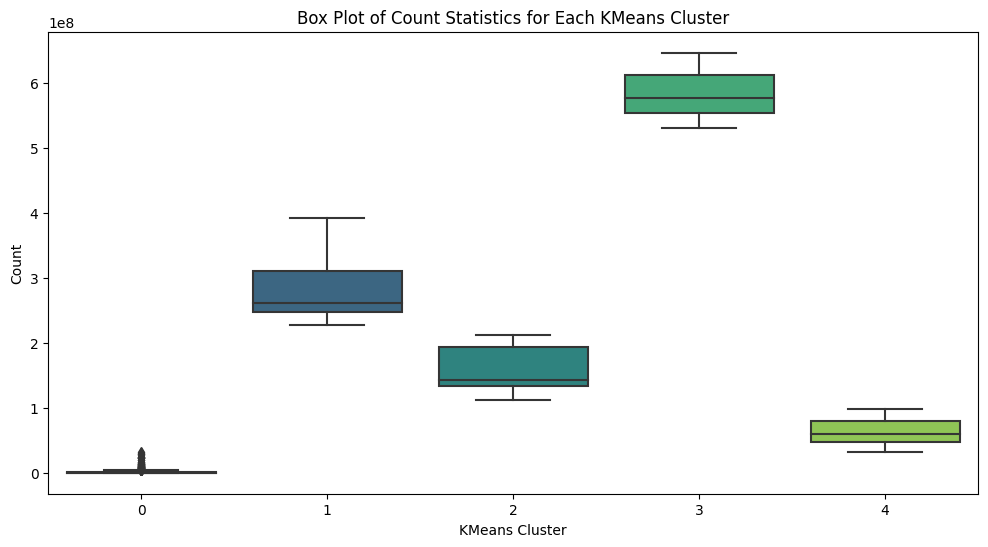

In [11]:
kmeans = KMeans(n_clusters=5, random_state=42)
route_counts['KMeansCluster'] = kmeans.fit_predict(route_counts_scaled)

# Plot the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x=route_counts.index, y=route_counts['Total_passengers'], hue=route_counts['KMeansCluster'], palette='viridis')
plt.title('KMeans Clustering with 7 Clusters')
plt.xlabel('Route Index')
plt.ylabel('Count')
plt.legend(title='KMeansCluster', loc='upper right')
plt.show()
# Plot the clusters
plt.figure(figsize=(12, 6))
sns.boxplot(x='KMeansCluster', y='Total_passengers', data=route_counts, palette='viridis')
plt.title('Box Plot of Count Statistics for Each KMeans Cluster')
plt.xlabel('KMeans Cluster')
plt.ylabel('Count')
plt.show()

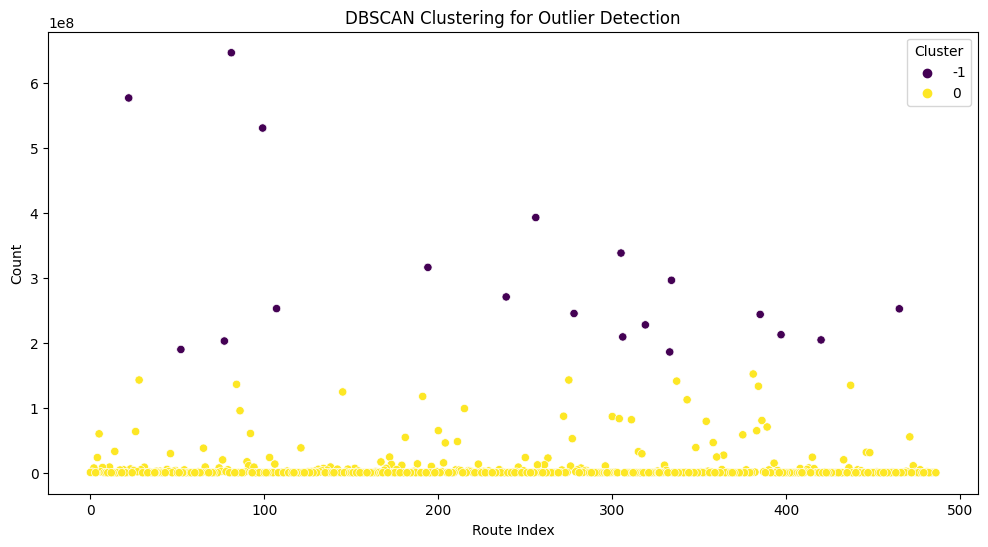

Outliers:
       Origin_city  Total_passengers  Total_departures  KMeansCluster  Cluster
81         Chicago         646795211           8371995              3       -1
22         Atlanta         577124363           6558089              3       -1
99          Dallas         530819958           6968858              3       -1
256    Los Angeles         393005676           4099901              1       -1
305       New York         338300987           4314435              1       -1
194        Houston         316228015           4348125              1       -1
334        Phoenix         296356229           3217133              1       -1
239      Las Vegas         270727645           2532432              1       -1
107        Detroit         252753776           3493846              1       -1
465     Washington         252426311           3726939              1       -1
278    Minneapolis         245203626           3205646              1       -1
385  San Francisco         243779917      

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import seaborn as sns

scaler = StandardScaler()
route_counts_scaled = scaler.fit_transform(route_counts[['Total_passengers']])
# Apply DBSCAN for outlier detection
dbscan = DBSCAN(eps=0.5, min_samples=10)
route_counts['Cluster'] = dbscan.fit_predict(route_counts_scaled)

# Plot the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x=route_counts.index, y=route_counts['Total_passengers'], hue=route_counts['Cluster'], palette='viridis')
plt.title('DBSCAN Clustering for Outlier Detection')
plt.xlabel('Route Index')
plt.ylabel('Count')
plt.legend(title='Cluster', loc='upper right')
plt.show()

# Display the outliers (Cluster == -1)
outliers = route_counts[route_counts['Cluster'] == -1]
print("Outliers:")
print(outliers)

In [13]:
outliers_city = outliers['Origin_city']
subset_df = df[df['Origin_city'].isin(outliers_city)]
subset_df.head()

,Origin_airport,Destination_airport,Month,Year,Total_passengers,Total_departures,Origin_city,Destination_city,Weekday,Day,Destination_population,Origin_population,Origin_state,Destination_state,Fly_date
8,SEA,RDM,2,1990,8,1,Seattle,Bend,Thursday,1,76034,5154164,Washington,Oregon,1990-02-01
9,SEA,RDM,1,1990,453,23,Seattle,Bend,Monday,1,76034,5154164,Washington,Oregon,1990-01-01
10,SEA,RDM,2,1990,784,20,Seattle,Bend,Thursday,1,76034,5154164,Washington,Oregon,1990-02-01
11,SEA,RDM,3,1990,749,22,Seattle,Bend,Thursday,1,76034,5154164,Washington,Oregon,1990-03-01
12,SEA,RDM,4,1990,11,1,Seattle,Bend,Sunday,1,76034,5154164,Washington,Oregon,1990-04-01


In [14]:
grouped_sub_df = subset_df.groupby(['Month','Day','Year','Origin_city','Weekday','Origin_population']).agg({'Total_passengers': 'sum', 'Total_departures': 'sum'}).reset_index()

In [15]:
grouped_sub_df.head()

,Month,Day,Year,Origin_city,Weekday,Origin_population,Total_passengers,Total_departures
0,1,1,1990,Atlanta,Monday,3087755,1564712,20708
1,1,1,1990,Boston,Monday,8269386,604819,8516
2,1,1,1990,Charlotte,Monday,1029829,478116,8841
3,1,1,1990,Chicago,Monday,16395048,1846104,28947
4,1,1,1990,Dallas,Monday,8019250,1791372,21994


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


X = grouped_sub_df.drop(['Total_passengers'], axis=1)
y = grouped_sub_df['Total_passengers']

# Define categorical features
categorical_features = ['Origin_city', 'Weekday']

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
    ],
    remainder='passthrough'
)

# Apply preprocessing to features
X_processed = preprocessor.fit_transform(X)

# Convert the preprocessed data to a DataFrame with column names
column_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)) + list(X.columns[len(categorical_features):])
X_processed = pd.DataFrame(X_processed.toarray(), columns=column_names)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mae = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')



Mean Absolute Error: 109291.27923893312


In [8]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plotting
plt.figure(figsize=(12, 6))

# Training data
# plt.scatter(y_train, y_train_pred, label='Training Data', color='blue', alpha=0.5)

# Testing data
plt.scatter(y_test, y_test_pred, label='Testing Data', color='green', alpha=0.5)

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Total Passengers')
plt.ylabel('Predicted Total Passengers')
plt.legend()
plt.show()

NameError: name 'model' is not defined

In [7]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plotting
plt.figure(figsize=(12, 6))

# Training data
# plt.scatter(y_train, y_train_pred, label='Training Data', color='blue', alpha=0.5)

# Testing data
plt.plot(y_test- y_test_pred, label='Testing Data', color='green', alpha=0.5)

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Total Passengers')
plt.ylabel('Predicted Total Passengers')
plt.legend()
plt.show()

NameError: name 'model' is not defined

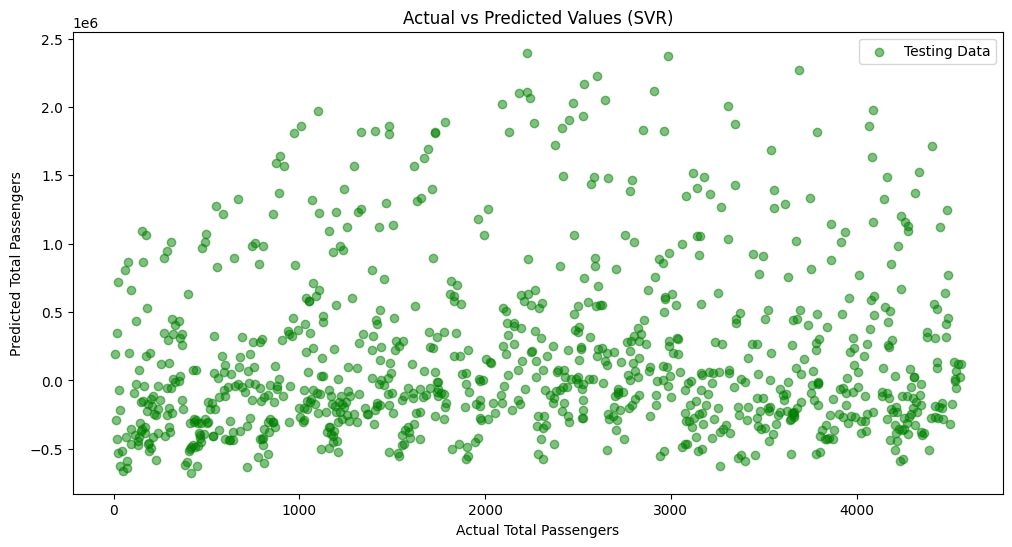

Mean Absolute Error (SVR): 444134.45300604496


In [22]:
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train, y_train)

# Model evaluation
y_train_pred = svr_model.predict(X_train)
y_test_pred = svr_model.predict(X_test)

# Plotting
plt.figure(figsize=(12, 6))

# Training data
# plt.scatter(y_train, y_train_pred, label='Training Data', color='blue', alpha=0.5)

# Testing data
plt.scatter(y_test.index, [y_test - y_test_pred], label='Testing Data', color='green', alpha=0.5)

plt.title('Actual vs Predicted Values (SVR)')
plt.xlabel('Actual Total Passengers')
plt.ylabel('Predicted Total Passengers')
plt.legend()
plt.show()

# Model evaluation using Mean Absolute Error
mae_svr = mean_absolute_error(y_test, y_test_pred)
print(f'Mean Absolute Error (SVR): {mae_svr}')

In [34]:
X

,Month,Day,Year,Origin_city,Weekday,Origin_population,Total_departures
0,1,1,1990,Atlanta,Monday,3087755,20708
1,1,1,1990,Boston,Monday,8269386,8516
2,1,1,1990,Charlotte,Monday,1029829,8841
3,1,1,1990,Chicago,Monday,16395048,28947
4,1,1,1990,Dallas,Monday,8019250,21994
...,...,...,...,...,...,...,...
4555,12,1,2009,Phoenix,Tuesday,4364094,14190
4556,12,1,2009,San Francisco,Tuesday,8635706,11037
4557,12,1,2009,Seattle,Tuesday,6815696,10440
4558,12,1,2009,St. Louis,Tuesday,2828990,6919
